<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia ✨**

---

## **1. Import the folder that exist on the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Import library**

In [ ]:
# import library yang dibutuhkan

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## **3. Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV)**

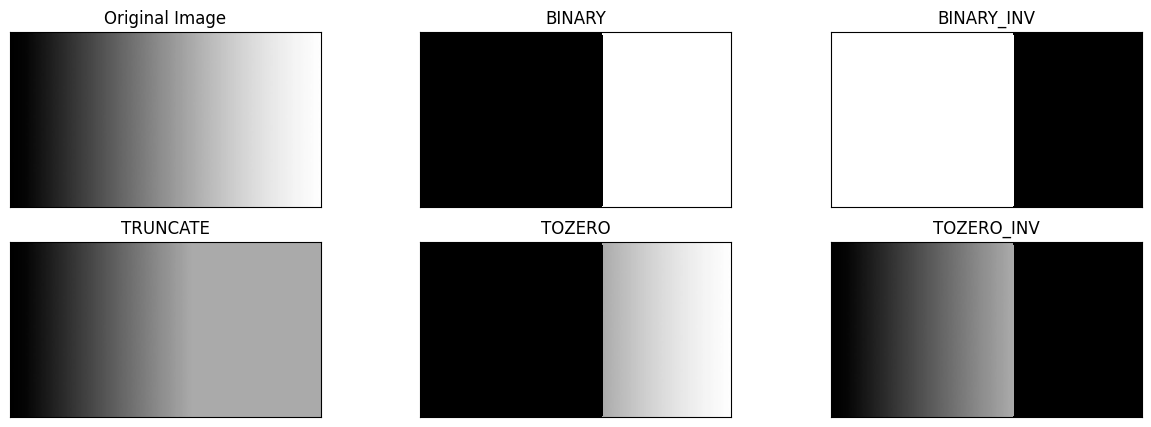

In [ ]:
# Import the gradient image
gradient_img = ('/content/drive/MyDrive/Images/gradient.jpg')

# Load the original image and create empty images for different thresholding methods
img = cv.imread(gradient_img)
original = cv.imread(gradient_img)
binary = cv.imread(gradient_img)
truncate = cv.imread(gradient_img)
tozero = cv.imread(gradient_img)
tozero_inverse = cv.imread(gradient_img)

# Threshold value
threshold_num = 170

# Apply various thresholding methods
# 1. Original Image
original[img > threshold_num] = 255
original[img <= threshold_num] = 0
# 2. Binary Threshold (Inverse)
binary = 255 - original
# 3. Threshold Truncate
truncate[img > threshold_num] = threshold_num
# 4. Threshold Tozero
tozero[img <= threshold_num] = 0
# 5. Threshold Tozero Inverse
tozero_inverse[img > threshold_num] = 0

# Titles for the images
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNCATE', 'TOZERO', 'TOZERO_INV']

# List of images
images = [img, original, binary, truncate, tozero, tozero_inverse]

# Display the images
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

## **4. Create Otsu Thresholding without using the Library. Also display the threshold value when you use Otsu's, as shown in the following image . (use the image lena_gs_lc2.jpg so that it really looks different between the otsu's results and the usual global threshold)**

<ipython-input-14-fe6ebdd1346a>:19: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb
<ipython-input-14-fe6ebdd1346a>:20: RuntimeWarning: invalid value encountered in divide
  mf = (sumb - sumb) / wf


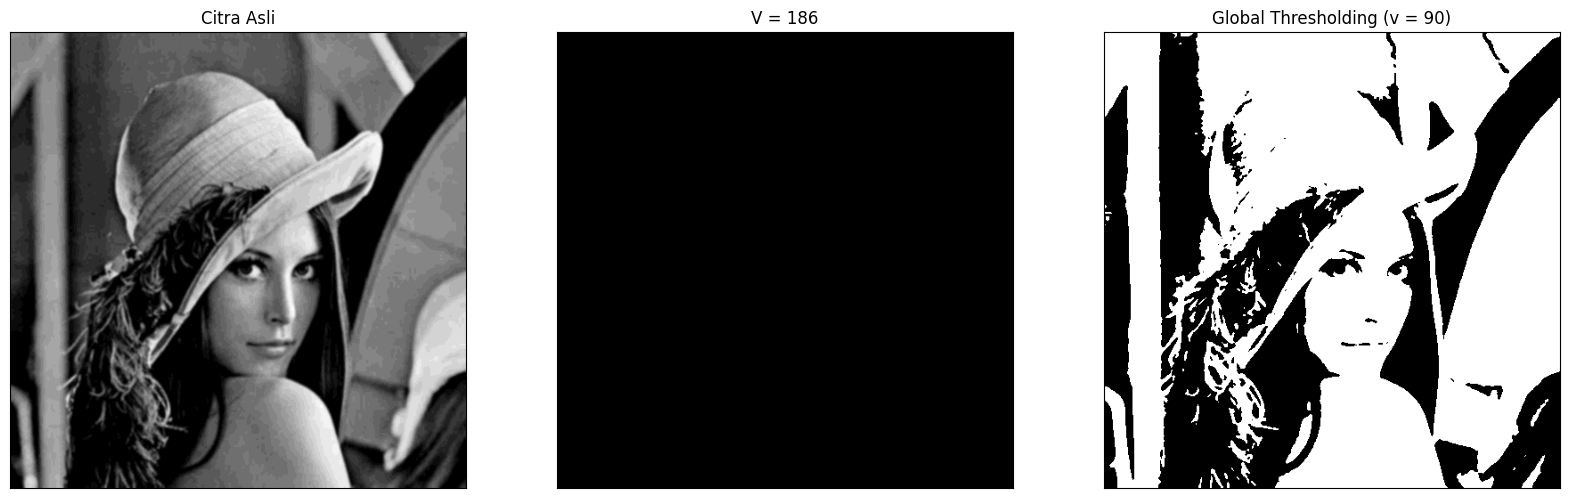

In [ ]:
lena_img = '/content/drive/MyDrive/Images/lena_gs_lc2.jpg'
img = cv.imread(lena_img, 0)
blur = cv.GaussianBlur(img, (5, 5), 0)

hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = float('inf')
thresh = -1

for i in range(0, 255):
    wb += hist[i]
    wf = (img.shape[0] * img.shape[1]) - wb
    sumb += (i * hist[i])
    mb = sumb / wb
    mf = (sumb - sumb) / wf
    betweenvar = wb * wf * (mb - mf) * (mb - mf)
    if (betweenvar > varmax):
        varmax = betweenvar
        thresh = i

x = "V = 186"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold(blur, 186, 255, cv.THRESH_BINARY)

titles = ['Citra Asli', x, 'Global Thresholding (v = 90)']
citra3 = [blur, th2, th1]

plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## **5. Create a histogram from a segmented image, the histogram is only in the foreground image. Use the Lily or Leaves image**
## a. You can use cv.calcHist to display a histogram.
## b. Open the folloiwng link https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
## c. From the link, note that cv.calcHist has one of the parameters, namely mask. If set to None, the entire image histogram will be counted. If we specify a mask, only the part of the image masked in white will be calculated for the histogram (from the example below it is called Image Segment)


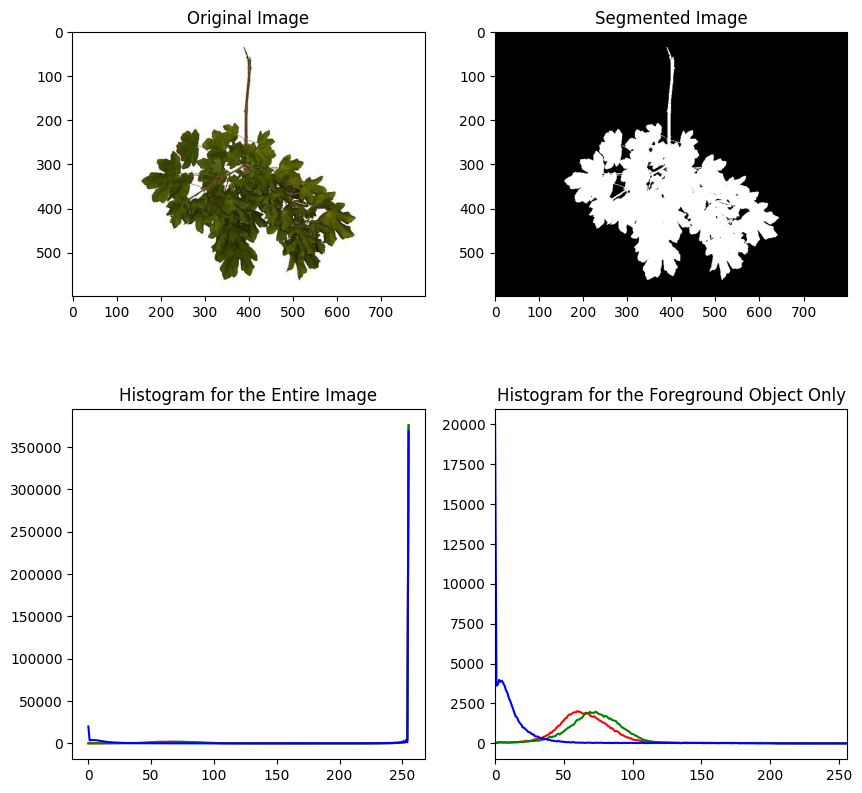

In [ ]:
# Load the image
img = cv.imread('/content/drive/MyDrive/Images/leaves.jpg')

# Convert the image to the RGB color scheme
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Convert RGB image to grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# Apply thresholding to create a binary mask
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

# Create a figure for displaying the images and histograms
plt.figure(figsize=(10, 10))

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

# Display the segmented image
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Segmented Image')

# Define color channels
colors = ('r', 'g', 'b')

# Plot histograms for each color channel
for i, color in enumerate(colors):
    # Calculate the histogram for the entire image
    hist_full = cv.calcHist([img_rgb], [i], None, [256], [0, 256])

    # Plot the histogram for the entire image
    plt.subplot(2, 2, 3)
    plt.plot(hist_full, color=color)
    plt.title('Histogram for the Entire Image')

    # Calculate the histogram for the masked region (foreground object)
    hist_masked = cv.calcHist([img_rgb], [i], mask, [256], [0, 256])

    # Plot the histogram for the masked region
    plt.subplot(2, 2, 4)
    plt.plot(hist_masked, color=color)
    plt.title('Histogram for the Foreground Object Only')
    plt.xlim([0, 256])

plt.show()

## **6. Perform color segmentation on the image "peppers.jpg", display only yellow colors . (Hint: you can use K-Means to display only certain colors). When you display a certain color, explain the problem you are facing and why it happened**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


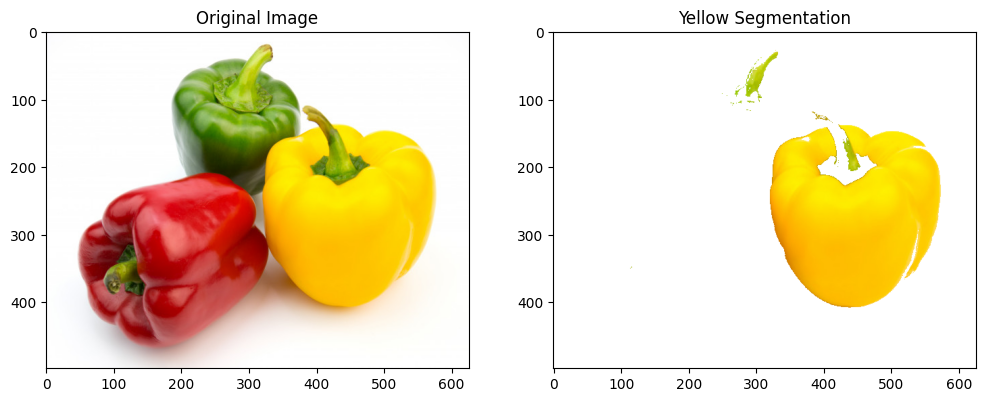

In [ ]:
from sklearn.cluster import KMeans

# Load the image
image = cv.imread('/content/drive/MyDrive/Images/peppers.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Convert the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Define the number of clusters (in this case, for yellow color)
num_clusters = 5  # Adjust this value as needed

# Create the K-Means model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the pixel data
kmeans.fit(pixels)

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_

# Find the cluster that represents the yellow color
yellow_cluster = None
min_distance = float('inf')

for i, color in enumerate(colors):
    # Define a reference yellow color
    reference_yellow = np.array([255, 255, 0], dtype=np.uint8)

    # Calculate the Euclidean distance between the color and reference_yellow
    distance = np.linalg.norm(color - reference_yellow)

    if distance < min_distance:
        min_distance = distance
        yellow_cluster = i

# Create a mask for the yellow cluster
yellow_mask = (kmeans.labels_ == yellow_cluster)

# Reshape the mask to match the image dimensions
yellow_mask = yellow_mask.reshape(image.shape[0], image.shape[1])

# Create a white background image
white_background = np.full_like(image, (255, 255, 255), dtype=np.uint8)

# Apply the mask to the white background
output_image = np.where(yellow_mask[..., None], image, white_background)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB)), plt.title('Yellow Segmentation')
plt.show()

kendala yang terjadi adalah hasil output yang diinginkan tidak dapat langsung diperoleh, diperlukan beberapa iterasi untuk menjalankan program sampai akhirnya diperoleh hasil yang diinignkan. hal ini terjadi karena K-Means merupakan metode clustering, sehingga pengelompokan dilakukan tanpa adanya label, sehingga perlu berulangkali di run agar mendapatkan kelompok yang kita inginkan.

## **7. Open the crossword.jpg file. With the knowledge of thresholding that you have learned. Perform binary thresholding with the best results in your opinion. Copy the code and image results in this module.**

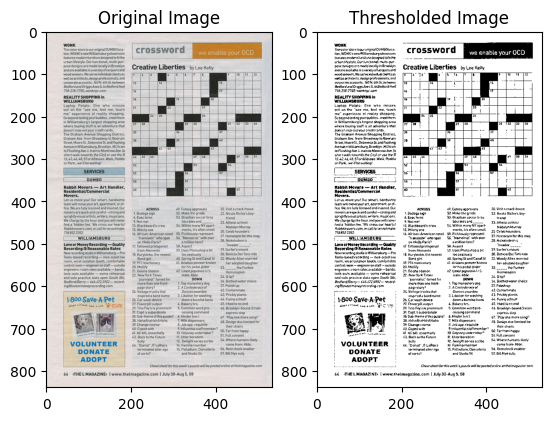

In [ ]:
# Load the image
crossword_img = cv.imread('/content/drive/MyDrive/Images/crossword.jpg')

# Convert the image to grayscale
img_gray = cv.cvtColor(crossword_img, cv.COLOR_BGR2GRAY)

# Perform binary thresholding (adjust the threshold value as needed)
_, binary_img = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY)

# Display the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(crossword_img, cv.COLOR_BGR2RGB))

# Display the thresholded image
plt.subplot(1, 2, 2)
plt.title('Thresholded Image')
plt.imshow(binary_img, cmap='gray')

plt.show()